## PROYECTO MACHINE LEARNING PREDICCIÓN PRECIOS AIRBNB ALEJANDRO RIOS SILVA

In [1]:
#!pip install plotly.express

In [2]:
import numpy  as np  
import pandas as pd
import plotly.express as px

import matplotlib.pyplot as plt
%matplotlib inline

✨ Lo primero que hacemos es leer el CSV 📄.🔍 Con shape miramos cuántas columnas y filas tiene 🧮,y con head sacamos las 5 primeras filas del DataFrame 🖥️.

In [3]:
data = pd.read_csv("C:/Users/alex-/Documents/BOOTCAMP KEEPCODING/06 Machine-Learning-101/Mi trabajo/airbnb-listings-extract.csv", decimal = ".", sep = ";")
print(data.shape)
data.head(5)


(14780, 89)


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


🔹 A continuación, divido entre Train y Test 📊 para asegurarme de que el modelo se evalúe de manera justa ⚖️ y pueda generalizar a datos nuevos 🆕.⚙️ Luego, cualquier procesamiento o ajuste se realiza únicamente en el conjunto de entrenamiento 🛠️.✂️ Divido dando un 80% de los datos a Train 🧩 y un 20% de los datos a Test 🧪.


In [4]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv("C:/Users/alex-/Documents/BOOTCAMP KEEPCODING/06 Machine-Learning-101/Mi trabajo/airbnb-listings-extract.csv", decimal = ".", sep = ";")
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv("C:/Users/alex-/Documents/BOOTCAMP KEEPCODING/06 Machine-Learning-101/Mi trabajo/airbnb-listings-extract_train.csv", decimal = ".", sep = ";", index=False)
test.to_csv("C:/Users/alex-/Documents/BOOTCAMP KEEPCODING/06 Machine-Learning-101/Mi trabajo/airbnb-listings-extract_test.csv", decimal = ".", sep = ";", index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 
airbnb_data = pd.read_csv("C:/Users/alex-/Documents/BOOTCAMP KEEPCODING/06 Machine-Learning-101/Mi trabajo/airbnb-listings-extract_train.csv", decimal = ".", sep = ";")
airbnb_data.head(5)

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,...,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,15520134,https://www.airbnb.com/rooms/15520134,20170407214119,2017-04-08,por persona la noche metro linea5 vista alegre,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",NaN,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557","Host Has Profile Pic,Host Identity Verified,Is..."
3,8809721,https://www.airbnb.com/rooms/8809721,20170407214119,2017-04-08,CITY CENTER JACINTO BENAVENTE ROOM4,This stunning and amazig room is covered with ...,NaN,This stunning and amazig room is covered with ...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"40.4128140929,-3.70305247638","Host Has Profile Pic,Requires License"
4,1162707,https://www.airbnb.com/rooms/1162707,20170407214119,2017-04-08,NICE & BIG DOUBLE ROOM AT DOWNTOWN,NaN,We are a young couple; David (Spain) and Ana (...,We are a young couple; David (Spain) and Ana (...,none,NaN,...,10.0,9.0,9.0,NaN,NaN,strict,2.0,2.08,"40.4386311984,-3.71371613279","Host Has Profile Pic,Host Identity Verified,Is..."


## Análisis exploratorio

🔍 A continuación, voy a usar describe, dtypes y shape 📊 para hacer un análisis de cómo se encuentran los datos 🧐.

In [5]:
airbnb_data.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.182400e+04,1.182400e+04,1.182400e+04,10317.000000,11821.000000,11821.000000,11824.000000,11824.000000,11824.000000,11780.000000,...,11824.000000,9163.000000,9143.000000,9148.000000,9136.000000,9147.000000,9133.000000,9132.000000,11820.000000,9285.000000
mean,1.025308e+07,2.017038e+13,3.588310e+07,94.803722,12.754420,12.754420,40.491628,-3.776863,3.277486,1.285229,...,22.664834,91.628179,9.410040,9.320726,9.623905,9.647863,9.534655,9.211345,9.615313,1.873326
std,5.566485e+06,5.505346e+08,3.411993e+07,15.247078,34.578895,34.578895,4.701030,14.014695,2.093973,0.664691,...,38.092338,9.137614,0.938013,1.004472,0.804050,0.765450,0.770421,0.963131,23.795580,1.869157
min,1.986400e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.124429,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.510692e+06,2.017041e+13,6.855490e+06,100.000000,1.000000,1.000000,40.409758,-3.707538,2.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.125754e+07,2.017041e+13,2.454770e+07,100.000000,2.000000,2.000000,40.419331,-3.700763,3.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.210000
75%,1.531982e+07,2.017041e+13,5.431096e+07,100.000000,6.000000,6.000000,40.430778,-3.683917,4.000000,1.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.858361e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,...,356.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [6]:
print(airbnb_data.dtypes)

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object


In [7]:
print(airbnb_data.shape)

(11824, 89)


📊 Ahora generaré las columnas que tiene el DataFrame 🗂️ para seguir con el análisis exploratorio 🔍 y ver cómo se encuentran los datos de una forma más visual 📈.

In [8]:
print(airbnb_data.columns)

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

Aquí podemos ver como se distribuyen los precios y su frecuencia.

In [9]:
fig = px.histogram(
    airbnb_data,
    x='Price',
    title='Distribución de precios',
    labels={'Price': 'Precio'},
    nbins=50,
    color_discrete_sequence=['#636EFA']
)
fig.update_layout(xaxis_title='Precio', yaxis_title='Frecuencia')
fig.show()

🔍 Observando los datos que tiene el DF veo muchas columnas que, aunque tienen datos interesantes como el barrio, la ciudad 🌆, o otro tipo de datos, en su mayoría son datos que vienen en formato STRING 🔤. Por esta razón, voy a eliminar dichas columnas del DF 🗑️ para poder hacer una matriz de correlación más sencilla 🔢.

También hay columnas que me parecen interesantes como latitud o longitud 🌍 para hacer predicciones 🔮, pero en este caso, para tener un modelo más sencillo, vamos a eliminarlas también ❌. De esta manera, se nos quedará un modelo más sencillo 💡.

In [10]:
airbnb_data = airbnb_data.drop([
    "Features", "Listing Url", "Scrape ID", "Last Scraped", "Description", "Name", "Summary", "Space", 
    "Neighborhood Overview", "Notes", "Transit", "Access", "Interaction", "House Rules", "Thumbnail Url", 
    "Medium Url", "Picture Url", "XL Picture Url", "Host URL", "Host Name", "Host About", "Host Response Time", 
    "Host Response Rate", "Host Acceptance Rate", "Host Thumbnail Url", "Host Picture Url", "Host Neighbourhood", 
    "Host Verifications", "Street", "Neighbourhood", "Neighbourhood Cleansed", "Neighbourhood Group Cleansed", 
    "Host Location", "Experiences Offered","City", "State", "Market", 
    "Smart Location", "Country Code", "Country", "Property Type", "Room Type", "Bed Type", "Calendar Update", 
    "Has Availability", "Calendar last Scraped", "First Review", "Last Review", "License", "Jurisdiction Names", 
    "Host Since", "Zipcode", "Calendar Updated", "Latitude", "Longitude", "Geolocation", 
    "Weekly Price", "Monthly Price", "Security Deposit","Review Scores Rating", "Review Scores Accuracy", "Review Scores Cleanliness", 
    "Review Scores Checkin", "Review Scores Communication", "Review Scores Location", 
    "Reviews per Month", "Number of Reviews","Availability 60", 
    "Availability 365", "Availability 30", "Square Feet", "Host Listings Count", "Host Total Listings", "Calculated host listings count", "Host Total Listings Count"
], axis=1, errors="ignore")

airbnb_data.head(5)

,ID,Host ID,Accommodates,Bathrooms,Bedrooms,Beds,Amenities,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 90,Review Scores Value,Cancellation Policy
0,5994463,31124866,4,1.0,1.0,2.0,"TV,Internet,Wireless Internet,Air conditioning...",60.0,25.0,1,0,2,1125,52,9.0,moderate
1,14136180,85301317,4,1.0,1.0,2.0,"TV,Internet,Wireless Internet,Air conditioning...",50.0,15.0,1,0,1,1125,64,10.0,flexible
2,15520134,84213235,1,1.5,1.0,8.0,"Internet,Wireless Internet,Wheelchair accessib...",10.0,5.0,1,0,3,30,74,NaN,moderate
3,8809721,15258781,2,3.0,1.0,1.0,"Wireless Internet,Kitchen,Smoking allowed,Heat...",30.0,NaN,1,0,10,1125,36,NaN,strict
4,1162707,1706029,2,1.0,1.0,1.0,"TV,Cable TV,Internet,Wireless Internet,Air con...",32.0,NaN,1,10,1,1125,62,9.0,strict


In [11]:
print(airbnb_data.columns)

Index(['ID', 'Host ID', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Amenities', 'Price', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Availability 90',
       'Review Scores Value', 'Cancellation Policy'],
      dtype='object')


🔧 Después de quedarme con las columnas que me parecían interesantes para poder realizar la predicción del modelo, voy a pasar a hacer algunas transformaciones 🔄.

En este caso, la columna 'Amenities' me parece interesante. A pesar de que esta tiene formato STRING 🔤, he decidido hacer un conteo de cuántas comodidades tiene cada piso 🏠.

De esta manera, al obtener el conteo, lo transformo en una variable numérica 🔢 para poder realizar la matriz de correlación con estos datos. Así crearé la columna 'Amenitie_Count'.
Cuando la tenga creada, borraré la columna 'Amenities' ❌ para evitar redundancia en los datos 🔄.

In [12]:
airbnb_data["Amenities_Count"] = airbnb_data['Amenities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

print(airbnb_data[["Amenities", "Amenities_Count"]])

#OTRA OPCION SERIA CREAR UNA COLUMNA BOLEANA PARA CADA AMENITIE DICIENDO SI LA TIENE O NO

                                               Amenities  Amenities_Count
0      TV,Internet,Wireless Internet,Air conditioning...               13
1      TV,Internet,Wireless Internet,Air conditioning...               18
2      Internet,Wireless Internet,Wheelchair accessib...               25
3      Wireless Internet,Kitchen,Smoking allowed,Heat...                5
4      TV,Cable TV,Internet,Wireless Internet,Air con...               15
...                                                  ...              ...
11819  TV,Internet,Wireless Internet,Kitchen,Breakfas...               17
11820  TV,Internet,Wireless Internet,Air conditioning...               13
11821  TV,Internet,Wireless Internet,Air conditioning...               18
11822  TV,Cable TV,Wireless Internet,Kitchen,Buzzer/w...               19
11823  TV,Internet,Wireless Internet,Kitchen,Doorman,...               15

[11824 rows x 2 columns]


In [13]:
airbnb_data = airbnb_data.drop(['Amenities'], axis=1, errors='ignore')
airbnb_data.head(5)

,ID,Host ID,Accommodates,Bathrooms,Bedrooms,Beds,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 90,Review Scores Value,Cancellation Policy,Amenities_Count
0,5994463,31124866,4,1.0,1.0,2.0,60.0,25.0,1,0,2,1125,52,9.0,moderate,13
1,14136180,85301317,4,1.0,1.0,2.0,50.0,15.0,1,0,1,1125,64,10.0,flexible,18
2,15520134,84213235,1,1.5,1.0,8.0,10.0,5.0,1,0,3,30,74,NaN,moderate,25
3,8809721,15258781,2,3.0,1.0,1.0,30.0,NaN,1,0,10,1125,36,NaN,strict,5
4,1162707,1706029,2,1.0,1.0,1.0,32.0,NaN,1,10,1,1125,62,9.0,strict,15


Vuelvo a imprimir las columnas que tiene el DF ya que me gusta ir viendo como va quedando.

In [14]:
print(airbnb_data.columns)

Index(['ID', 'Host ID', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Price', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Availability 90',
       'Review Scores Value', 'Cancellation Policy', 'Amenities_Count'],
      dtype='object')


🚶‍♂️ El siguiente paso es ver qué columnas tienen NAN ❓, ya que estos pueden dar errores ⚠️.

Mis siguientes pasos serán trabajar con estos NAN para que no quede ninguno en el DF 🧹.

In [15]:
print(airbnb_data.isnull().any()[airbnb_data.isnull().any()])

Bathrooms              True
Bedrooms               True
Beds                   True
Price                  True
Cleaning Fee           True
Review Scores Value    True
dtype: bool


🔍 Después de ver las columnas que tienen NAN ❓, voy a sacar qué porcentaje de NAN tiene cada columna 📊 y así poder ver si me renta más eliminar los NAN o sustituirlos 🔄.

In [16]:
null_percentages = airbnb_data.isnull().mean() * 100

null_percentages_sorted = null_percentages.sort_values(ascending=False)

print(null_percentages_sorted)

Cleaning Fee           41.018268
Review Scores Value    22.767253
Bathrooms               0.372124
Beds                    0.312923
Bedrooms                0.169147
Price                   0.126861
ID                      0.000000
Host ID                 0.000000
Accommodates            0.000000
Guests Included         0.000000
Extra People            0.000000
Minimum Nights          0.000000
Maximum Nights          0.000000
Availability 90         0.000000
Cancellation Policy     0.000000
Amenities_Count         0.000000
dtype: float64


💡 En el caso de la columna 'Cleaning Fee', es una columna numérica que indica el precio que te cobran por la limpieza 🧼.

En este caso, he decidido obviar el precio en sí que te cobran y hacer una transformación de dicha columna 🔄. Así, en caso de que tenga un precio de 0 o un NAN ❓, pondré el valor 0, y en caso de que tenga algún precio, pondré el valor 1.

De esta manera, podemos saber cuáles tienen un precio por limpieza y cuáles no.

In [17]:
# Crear la columna 'Has_Cleaning_Fee' con valor 1 si hay 'Cleaning Fee' (no es NaN ni 0)
airbnb_data['Has_Cleaning_Fee'] = airbnb_data['Cleaning Fee'].apply(lambda x: 1 if pd.notna(x) and x > 0 else 0)

# Crear la columna 'Cleaning_Fee_Amount' con el valor de 'Cleaning Fee' o 0 si no hay
airbnb_data['Cleaning_Fee_Amount'] = airbnb_data['Cleaning Fee'].apply(lambda x: x if pd.notna(x) and x > 0 else 0)

airbnb_data = airbnb_data.drop(['Cleaning Fee'], axis=1)

# Ver el resultado
print(airbnb_data[['Has_Cleaning_Fee', 'Cleaning_Fee_Amount']].head())

   Has_Cleaning_Fee  Cleaning_Fee_Amount
0                 1                 25.0
1                 1                 15.0
2                 1                  5.0
3                 0                  0.0
4                 0                  0.0


🔍 La columna 'Cancellation Policy' me parece interesante para poder hacer una predicción del precio 💰.

En este caso, vamos a usar OneHotEncoder 🔥. De esta manera, vamos a dividir dicha columna en varias columnas que nos indicarán si tienen una política de cancelación o no, y su estado entre estricta, moderada o flexible.

Así, podremos añadirla a nuestra matriz de correlación 📊 para poder hacer el análisis 🔍.

In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded_values = encoder.fit_transform(airbnb_data[['Cancellation Policy']])
encoded_df = pd.DataFrame(encoded_values, columns=encoder.get_feature_names_out(['Cancellation Policy']))
airbnb_data = pd.concat([airbnb_data, encoded_df], axis=1)

airbnb_data = airbnb_data.drop(['Cancellation Policy'], axis=1)

print(airbnb_data.head())

         ID   Host ID  Accommodates  Bathrooms  Bedrooms  Beds  Price  \
0   5994463  31124866             4        1.0       1.0   2.0   60.0   
1  14136180  85301317             4        1.0       1.0   2.0   50.0   
2  15520134  84213235             1        1.5       1.0   8.0   10.0   
3   8809721  15258781             2        3.0       1.0   1.0   30.0   
4   1162707   1706029             2        1.0       1.0   1.0   32.0   

   Guests Included  Extra People  Minimum Nights  ...  Has_Cleaning_Fee  \
0                1             0               2  ...                 1   
1                1             0               1  ...                 1   
2                1             0               3  ...                 1   
3                1             0              10  ...                 0   
4                1            10               1  ...                 0   

   Cleaning_Fee_Amount  Cancellation Policy_flexible  \
0                 25.0                           0.0  

c:\Users\alex-\anaconda2\envs\KCML\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



🔧 Respecto a las columnas "Bathrooms", "Bedrooms", "Review Scores Value", "Beds", he decidido usar la moda de dichas columnas para sustituir los NAN que hay 🔄.

In [19]:
columns_to_fill = ["Bathrooms", "Bedrooms", "Review Scores Value", "Beds"]

for column in columns_to_fill:
    mode_value = airbnb_data[column].mode()[0]
    airbnb_data[column].fillna(mode_value, inplace=True)
    
airbnb_data.head(5)

,ID,Host ID,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,...,Has_Cleaning_Fee,Cleaning_Fee_Amount,Cancellation Policy_flexible,Cancellation Policy_flexible_new,Cancellation Policy_moderate,Cancellation Policy_moderate_new,Cancellation Policy_strict,Cancellation Policy_strict_new,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
0,5994463,31124866,4,1.0,1.0,2.0,60.0,1,0,2,...,1,25.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,14136180,85301317,4,1.0,1.0,2.0,50.0,1,0,1,...,1,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15520134,84213235,1,1.5,1.0,8.0,10.0,1,0,3,...,1,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,8809721,15258781,2,3.0,1.0,1.0,30.0,1,0,10,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1162707,1706029,2,1.0,1.0,1.0,32.0,1,10,1,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


🔍 Volvemos a revisar para ver si, después de la limpieza, nos queda algún valor nulo en el modelo.

En este caso, nos quedan nulos en la columna 'precio' 💵. Si recordamos, anteriormente calculamos el porcentaje de valores nulos por columna y el porcentaje de nulos en 'precio' era muy bajo 📉.

Además, 'precio' es la variable que queremos predecir, por lo tanto, no nos interesa que tenga valores nulos 🚫.

Por lo tanto, vamos a borrar las filas que tengan valores nulos en la columna 'precio' 🗑️.

In [20]:
print(airbnb_data.isnull().any())

ID                                     False
Host ID                                False
Accommodates                           False
Bathrooms                              False
Bedrooms                               False
Beds                                   False
Price                                   True
Guests Included                        False
Extra People                           False
Minimum Nights                         False
Maximum Nights                         False
Availability 90                        False
Review Scores Value                    False
Amenities_Count                        False
Has_Cleaning_Fee                       False
Cleaning_Fee_Amount                    False
Cancellation Policy_flexible           False
Cancellation Policy_flexible_new       False
Cancellation Policy_moderate           False
Cancellation Policy_moderate_new       False
Cancellation Policy_strict             False
Cancellation Policy_strict_new         False
Cancellati

In [21]:
airbnb_data = airbnb_data.dropna(subset=['Price'])

print(airbnb_data[['Price']].head())

   Price
0   60.0
1   50.0
2   10.0
3   30.0
4   32.0


🔍 Volvemos a comprobar si queda algún nulo, y comprobamos que todo se queda correcto ✅!!!

In [22]:
print(airbnb_data.isnull().any())

ID                                     False
Host ID                                False
Accommodates                           False
Bathrooms                              False
Bedrooms                               False
Beds                                   False
Price                                  False
Guests Included                        False
Extra People                           False
Minimum Nights                         False
Maximum Nights                         False
Availability 90                        False
Review Scores Value                    False
Amenities_Count                        False
Has_Cleaning_Fee                       False
Cleaning_Fee_Amount                    False
Cancellation Policy_flexible           False
Cancellation Policy_flexible_new       False
Cancellation Policy_moderate           False
Cancellation Policy_moderate_new       False
Cancellation Policy_strict             False
Cancellation Policy_strict_new         False
Cancellati

⏰ Llegó la hora de hacer la matriz de correlación para ver qué tal se ajustan los datos. De esta manera, medimos la fuerza y dirección de las relaciones lineales entre las variables numéricas del DF 📊.

Esta matriz nos ayudará para eliminar variables redundantes que están muy correlacionadas entre sí (reducción de multicolinealidad) 🔻, identificar patrones, como si el aumento de una variable está asociado con el aumento (correlación positiva ➕) o disminución (correlación negativa ➖) de otra.

In [23]:
airbnb_data.corr()

,ID,Host ID,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,...,Has_Cleaning_Fee,Cleaning_Fee_Amount,Cancellation Policy_flexible,Cancellation Policy_flexible_new,Cancellation Policy_moderate,Cancellation Policy_moderate_new,Cancellation Policy_strict,Cancellation Policy_strict_new,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
ID,1.000000,0.613361,-0.090796,-0.062064,-0.062505,-0.098329,-0.040946,-0.089272,-0.101849,-0.039711,...,-0.021869,-0.057651,0.169913,0.004455,-0.060578,-0.028534,-0.104741,-0.032319,0.049320,0.000680
Host ID,0.613361,1.000000,-0.099768,-0.056380,-0.075051,-0.074013,-0.052158,-0.079544,-0.089944,-0.031662,...,-0.118926,-0.142751,0.181101,0.001188,-0.051696,-0.023282,-0.125101,-0.020915,0.074977,-0.020192
Accommodates,-0.090796,-0.099768,1.000000,0.428245,0.721047,0.835636,0.528380,0.565060,0.251381,0.006699,...,0.194892,0.343448,-0.223678,0.016438,-0.003979,0.001117,0.210675,0.001443,0.027109,0.034604
Bathrooms,-0.062064,-0.056380,0.428245,1.000000,0.516660,0.470689,0.378409,0.240117,0.083515,0.030449,...,0.007643,0.197506,-0.092458,0.016744,-0.098517,-0.010176,0.172978,0.006417,0.014199,0.049085
Bedrooms,-0.062505,-0.075051,0.721047,0.516660,1.000000,0.725291,0.492313,0.435339,0.132868,0.020766,...,0.089726,0.299375,-0.096247,0.007240,-0.049744,-0.007606,0.132606,0.006983,0.010378,0.043401
Beds,-0.098329,-0.074013,0.835636,0.470689,0.725291,1.000000,0.437660,0.456701,0.186302,0.007440,...,0.096846,0.266358,-0.150797,0.010171,-0.023341,0.001638,0.161518,0.003851,0.003128,0.029043
Price,-0.040946,-0.052158,0.528380,0.378409,0.492313,0.437660,1.000000,0.296850,0.104672,0.029632,...,0.075488,0.431278,-0.090656,0.007371,-0.076211,0.001702,0.147543,0.021247,0.011753,0.064108
Guests Included,-0.089272,-0.079544,0.565060,0.240117,0.435339,0.456701,0.296850,1.000000,0.358659,0.003170,...,0.225805,0.261092,-0.187230,0.016500,0.026317,-0.006493,0.152524,-0.009360,0.013807,0.013150
Extra People,-0.101849,-0.089944,0.251381,0.083515,0.132868,0.186302,0.104672,0.358659,1.000000,-0.019904,...,0.202798,0.176034,-0.160879,0.012527,0.036607,0.014580,0.104018,-0.008551,0.166008,0.018131
Minimum Nights,-0.039711,-0.031662,0.006699,0.030449,0.020766,0.007440,0.029632,0.003170,-0.019904,1.000000,...,0.016569,0.076430,-0.027004,-0.002173,-0.014244,0.000002,0.039992,-0.002418,-0.005631,-0.001770


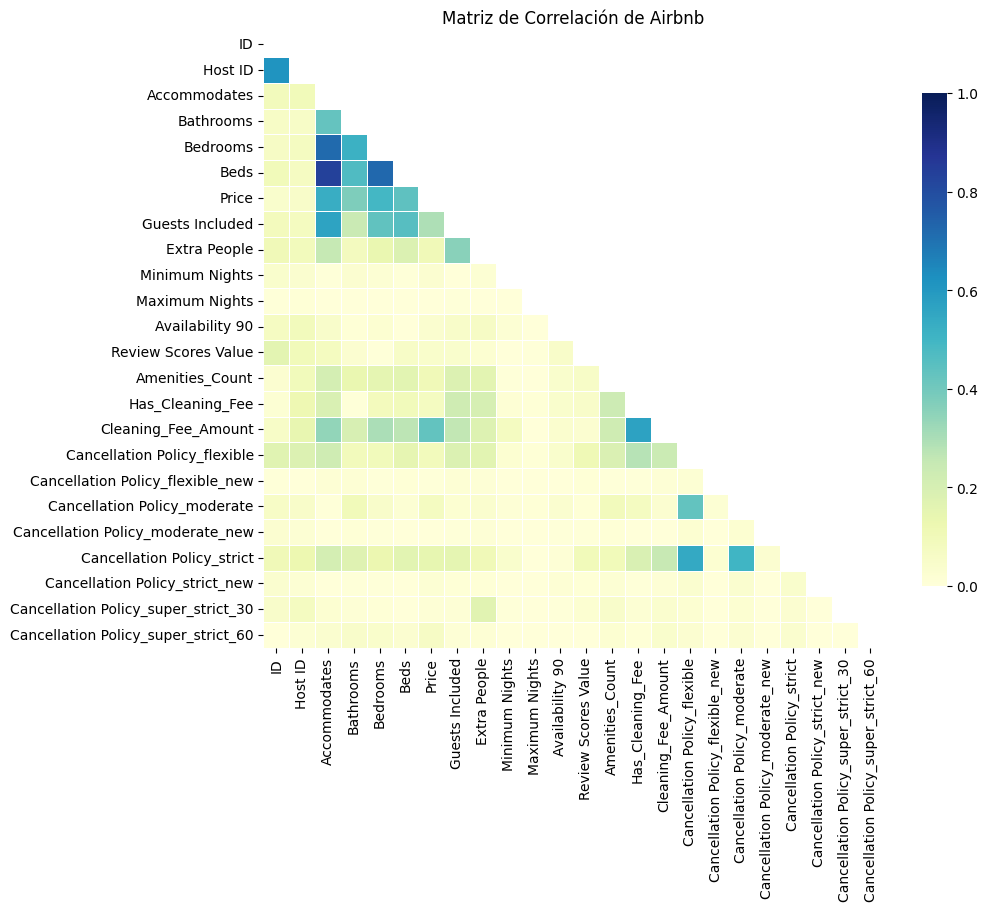

In [24]:
import seaborn as sns

corr = np.abs(airbnb_data.corr())

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            annot=False, linewidths=0.5, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.title("Matriz de Correlación de Airbnb")
plt.show()

🔍 Tras hacer la matriz de correlación, observo que visiblemente las variables que mejor están relacionadas con price (que es lo que queremos predecir) 💰, son Accommodates, Bathrooms, Bedrooms, Beds 🛏️.

Aún así, voy a calcular qué variables tienen una correlación con el precio de al menos un 10% 📊. Usaré todas las resultantes para hacer la predicción 🔮.

In [25]:
correlation_matrix = airbnb_data.corr()

variables_with_corr = correlation_matrix['Price'][abs(correlation_matrix['Price']) > 0.1].index.tolist()

variables_with_corr.remove('Price')

variables_with_corr

['Accommodates',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Guests Included',
 'Extra People',
 'Amenities_Count',
 'Cleaning_Fee_Amount',
 'Cancellation Policy_strict']

In [26]:
# !pip install xgboost

🔧 A continuación entrenaré el scaler para transformar los datos con el conjunto de train entero, de forma que se aplica la misma transformación al conjunto de test.

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(airbnb_data[variables_with_corr]) 

StandardScaler()

🔧 Ahora realizaré una optimización de los hiperparámetros de varios modelos de regresión para encontrar el que mejor prediga los precios de Airbnb 🏡💰, utilizando validación cruzada 🔄 y Hyperopt 🔍. 

Luego, entrenaré el modelo final con los mejores parámetros y evalúa su rendimiento 📊.

In [28]:
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin, space_eval
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

# Dividir los datos en entrenamiento y prueba
X = airbnb_data[variables_with_corr]  # Variables independientes
y = airbnb_data['Price']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el espacio de búsqueda
space = hp.choice('regressors', [
    {
        'model': RandomForestRegressor,
        'params': {
            'n_estimators': hp.choice('rf.n_estimators', range(100, 1001, 100)),
            'max_depth': hp.choice('rf.max_depth', [None] + list(range(5, 31))),
            'min_samples_split': hp.choice('rf.min_samples_split', range(2, 20)),
            'min_samples_leaf': hp.choice('rf.min_samples_leaf', range(1, 20)),
            'bootstrap': hp.choice('rf.bootstrap', [True, False]),
            'max_features': hp.uniform('rf.max_features', 0.3, 0.7)
        }
    },
    {
        'model': KNeighborsRegressor,
        'params': {
            'n_neighbors': hp.choice('knn.n_neighbors', range(1, 21)),
            'weights': hp.choice('knn.weights', ['uniform', 'distance']),
            'algorithm': hp.choice('knn.algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
            'leaf_size': hp.choice('knn.leaf_size', range(10, 60, 5)),
            'p': hp.choice('knn.p', [1, 2]),
        }
    },
    {
        'model': XGBRegressor,
        'params': {
            'objective': 'reg:squarederror',
            'max_depth': hp.choice('xgb.max_depth', range(3, 16)),
            'n_estimators': hp.choice('xgb.n_estimators', range(100, 1001, 50)),
            'learning_rate': hp.loguniform('xgb.learning_rate', np.log(0.01), np.log(0.2)),
            'gamma': hp.uniform('xgb.gamma', 0, 5),
            'min_child_weight': hp.choice('xgb.min_child_weight', range(1, 11)),
            'subsample': hp.uniform('xgb.subsample', 0.5, 1),
            'colsample_bytree': hp.uniform('xgb.colsample_bytree', 0.5, 1),
            'reg_lambda': hp.uniform('xgb.reg_lambda', 0, 1),
            'reg_alpha': hp.uniform('xgb.reg_alpha', 0, 1)
        }
    },
    {
        'model': Lasso,
        'params': {
            'alpha': hp.loguniform('lasso.alpha', np.log(0.001), np.log(10)),
            'max_iter': hp.choice('lasso.max_iter', [1000, 2000, 5000]),
            'tol': hp.uniform('lasso.tol', 1e-4, 1e-2)
        }
    },
    {
        'model': LinearRegression,
        'params': {}
    }
])

# Definir la función objetivo
def objective(params):
    Model = params['model']
    model_params = params['params']

    # Crear el modelo
    model = Model(**model_params)

    # Estandarización para Lasso
    if Model == Lasso:
        model = make_pipeline(StandardScaler(), model)

    # Evaluar con Cross-Validation
    scores = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)

    # Retornar el negativo de la media de los scores (ya que Hyperopt busca minimizar)
    return {'loss': -scores.mean(), 'status': STATUS_OK}

# Ejecutar la búsqueda de hiperparámetros
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

# Obtener los mejores parámetros
best_space = space_eval(space, best)
best_model = best_space['model']
best_params = best_space['params']

# Entrenar el mejor modelo con todos los datos
final_model = best_model(**best_params)

# Si es Lasso, aplicar la estandarización también a todo el conjunto de datos
if best_model == Lasso:
    final_model = make_pipeline(StandardScaler(), final_model)

final_model.fit(X_train, y_train)

# Evaluar el modelo final
y_pred = final_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mejor modelo: {best_model.__name__}")
print(f"Mejores parámetros: {best_params}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

# Guardar el modelo final entrenado
joblib.dump(final_model, 'mejor_modelo_airbnb.pkl')

100%|██████████| 100/100 [12:02<00:00,  7.22s/trial, best loss: 46.082118913520866]
Mejor modelo: RandomForestRegressor
Mejores parámetros: {'bootstrap': True, 'max_depth': 13, 'max_features': 0.4545465316074817, 'min_samples_leaf': 1, 'min_samples_split': 15, 'n_estimators': 800}
RMSE: 43.99618581205317
MAE: 22.63018134290054
R2: 0.6118733605787032


['mejor_modelo_airbnb.pkl']

Después de entrenar el modelo, con el modelo que mejor resultado he obtenido es con RandomForestRegressor 🏆, de esta manera, será el que usemos para predecir con el conjunto de Test 🔮.

## VAMOS CON TEST


Ya he explicado los pasos de las transformaciones anteriormente 🔄, para el Test 🧪, lo primero que voy a hacer es cargar el DF de test que guardamos previamente 💾, y lo siguiente es realizar todas las transformaciones que ya hice en Train 📊.

In [29]:
airbnb_data_test = pd.read_csv("C:/Users/alex-/Documents/BOOTCAMP KEEPCODING/06 Machine-Learning-101/Mi trabajo/airbnb-listings-extract.csv", decimal = ".", sep = ";")

In [30]:
airbnb_data_test = airbnb_data_test.drop([
    "Features", "Listing Url", "Scrape ID", "Last Scraped", "Description", "Name", "Summary", "Space", 
    "Neighborhood Overview", "Notes", "Transit", "Access", "Interaction", "House Rules", "Thumbnail Url", 
    "Medium Url", "Picture Url", "XL Picture Url", "Host URL", "Host Name", "Host About", "Host Response Time", 
    "Host Response Rate", "Host Acceptance Rate", "Host Thumbnail Url", "Host Picture Url", "Host Neighbourhood", 
    "Host Verifications", "Street", "Neighbourhood", "Neighbourhood Cleansed", "Neighbourhood Group Cleansed", 
    "Host Location", "Experiences Offered","City", "State", "Market", 
    "Smart Location", "Country Code", "Country", "Property Type", "Room Type", "Bed Type", "Calendar Update", 
    "Has Availability", "Calendar last Scraped", "First Review", "Last Review", "License", "Jurisdiction Names", 
    "Host Since", "Zipcode", "Calendar Updated", "Latitude", "Longitude", "Geolocation", 
    "Weekly Price", "Monthly Price", "Security Deposit","Review Scores Rating", "Review Scores Accuracy", "Review Scores Cleanliness", 
    "Review Scores Checkin", "Review Scores Communication", "Review Scores Location", 
    "Reviews per Month", "Number of Reviews","Availability 60", 
    "Availability 365", "Availability 30", "Square Feet", "Host Listings Count", "Host Total Listings", "Calculated host listings count", "Host Total Listings Count"
], axis=1, errors="ignore")

airbnb_data_test.head(5)

,ID,Host ID,Accommodates,Bathrooms,Bedrooms,Beds,Amenities,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 90,Review Scores Value,Cancellation Policy
0,11210388,58386783,2,1.0,1.0,1.0,"TV,Cable TV,Internet,Wireless Internet,Air con...",58.0,NaN,1,0,2,1125,64,10.0,moderate
1,17471131,102947901,4,1.0,1.0,1.0,"Wireless Internet,Air conditioning,Elevator in...",70.0,40.0,2,44,1,1125,39,10.0,super_strict_30
2,17584891,102947901,4,1.0,1.0,1.0,"Wireless Internet,Air conditioning,Elevator in...",70.0,60.0,2,42,1,1125,42,NaN,super_strict_30
3,5398030,131794,8,2.0,3.0,4.0,"TV,Internet,Wireless Internet,Air conditioning...",229.0,79.0,2,39,2,1125,47,9.0,strict
4,18104606,54310958,5,1.0,2.0,2.0,"TV,Wireless Internet,Air conditioning,Kitchen,...",149.0,55.0,1,0,2,1125,0,NaN,flexible


In [31]:
airbnb_data_test["Amenities_Count"] = airbnb_data_test['Amenities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

print(airbnb_data_test[["Amenities", "Amenities_Count"]])

                                               Amenities  Amenities_Count
0      TV,Cable TV,Internet,Wireless Internet,Air con...               23
1      Wireless Internet,Air conditioning,Elevator in...                7
2      Wireless Internet,Air conditioning,Elevator in...                7
3      TV,Internet,Wireless Internet,Air conditioning...               24
4      TV,Wireless Internet,Air conditioning,Kitchen,...               12
...                                                  ...              ...
14775  TV,Cable TV,Internet,Wireless Internet,Air con...               11
14776  TV,Wireless Internet,Kitchen,Breakfast,Elevato...               11
14777  TV,Cable TV,Internet,Wireless Internet,Air con...               17
14778  Internet,Wireless Internet,Kitchen,Heating,Was...               18
14779  TV,Cable TV,Internet,Wireless Internet,Air Con...               21

[14780 rows x 2 columns]


In [32]:
columns_to_fill = ["Bathrooms", "Bedrooms", "Review Scores Value", "Beds"]

for column in columns_to_fill:
    mode_value = airbnb_data_test[column].mode()[0]
    airbnb_data_test[column].fillna(mode_value, inplace=True)
    
airbnb_data_test.head(5)

,ID,Host ID,Accommodates,Bathrooms,Bedrooms,Beds,Amenities,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 90,Review Scores Value,Cancellation Policy,Amenities_Count
0,11210388,58386783,2,1.0,1.0,1.0,"TV,Cable TV,Internet,Wireless Internet,Air con...",58.0,NaN,1,0,2,1125,64,10.0,moderate,23
1,17471131,102947901,4,1.0,1.0,1.0,"Wireless Internet,Air conditioning,Elevator in...",70.0,40.0,2,44,1,1125,39,10.0,super_strict_30,7
2,17584891,102947901,4,1.0,1.0,1.0,"Wireless Internet,Air conditioning,Elevator in...",70.0,60.0,2,42,1,1125,42,10.0,super_strict_30,7
3,5398030,131794,8,2.0,3.0,4.0,"TV,Internet,Wireless Internet,Air conditioning...",229.0,79.0,2,39,2,1125,47,9.0,strict,24
4,18104606,54310958,5,1.0,2.0,2.0,"TV,Wireless Internet,Air conditioning,Kitchen,...",149.0,55.0,1,0,2,1125,0,10.0,flexible,12


In [33]:
airbnb_data_test = airbnb_data_test.drop(['Amenities'], axis=1, errors='ignore')
airbnb_data_test.head(5)

,ID,Host ID,Accommodates,Bathrooms,Bedrooms,Beds,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 90,Review Scores Value,Cancellation Policy,Amenities_Count
0,11210388,58386783,2,1.0,1.0,1.0,58.0,NaN,1,0,2,1125,64,10.0,moderate,23
1,17471131,102947901,4,1.0,1.0,1.0,70.0,40.0,2,44,1,1125,39,10.0,super_strict_30,7
2,17584891,102947901,4,1.0,1.0,1.0,70.0,60.0,2,42,1,1125,42,10.0,super_strict_30,7
3,5398030,131794,8,2.0,3.0,4.0,229.0,79.0,2,39,2,1125,47,9.0,strict,24
4,18104606,54310958,5,1.0,2.0,2.0,149.0,55.0,1,0,2,1125,0,10.0,flexible,12


In [34]:
# Crear la columna 'Has_Cleaning_Fee' con valor 1 si hay 'Cleaning Fee' (no es NaN ni 0)
airbnb_data_test['Has_Cleaning_Fee'] = airbnb_data_test['Cleaning Fee'].apply(lambda x: 1 if pd.notna(x) and x > 0 else 0)

# Crear la columna 'Cleaning_Fee_Amount' con el valor de 'Cleaning Fee' o 0 si no hay
airbnb_data_test['Cleaning_Fee_Amount'] = airbnb_data_test['Cleaning Fee'].apply(lambda x: x if pd.notna(x) and x > 0 else 0)

airbnb_data_test = airbnb_data_test.drop(['Cleaning Fee'], axis=1)

# Ver el resultado
print(airbnb_data_test[['Has_Cleaning_Fee', 'Cleaning_Fee_Amount']].head())

   Has_Cleaning_Fee  Cleaning_Fee_Amount
0                 0                  0.0
1                 1                 40.0
2                 1                 60.0
3                 1                 79.0
4                 1                 55.0


In [35]:
# Creamos un objeto OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Ajustamos y transformamos la columna 'Cancellation Policy'
encoded_values = encoder.fit_transform(airbnb_data_test[['Cancellation Policy']])

# Creamos un DataFrame con las columnas resultantes
encoded_df = pd.DataFrame(encoded_values, columns=encoder.get_feature_names_out(['Cancellation Policy']))

# Concatenamos el DataFrame original con las nuevas columnas generadas
airbnb_data_test = pd.concat([airbnb_data_test, encoded_df], axis=1)

# Ahora podemos borrar la columna original 'Cancellation Policy' si ya no la necesitamos
airbnb_data_test = airbnb_data_test.drop(['Cancellation Policy'], axis=1)


c:\Users\alex-\anaconda2\envs\KCML\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [36]:
airbnb_data_test = airbnb_data_test.dropna(subset=['Price'])

In [37]:
airbnb_data_test.head(5)

,ID,Host ID,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,...,Has_Cleaning_Fee,Cleaning_Fee_Amount,Cancellation Policy_flexible,Cancellation Policy_flexible_new,Cancellation Policy_moderate,Cancellation Policy_moderate_new,Cancellation Policy_strict,Cancellation Policy_strict_new,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
0,11210388,58386783,2,1.0,1.0,1.0,58.0,1,0,2,...,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,17471131,102947901,4,1.0,1.0,1.0,70.0,2,44,1,...,1,40.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,17584891,102947901,4,1.0,1.0,1.0,70.0,2,42,1,...,1,60.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5398030,131794,8,2.0,3.0,4.0,229.0,2,39,2,...,1,79.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,18104606,54310958,5,1.0,2.0,2.0,149.0,1,0,2,...,1,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
print(airbnb_data_test.isnull().any())

ID                                     False
Host ID                                False
Accommodates                           False
Bathrooms                              False
Bedrooms                               False
Beds                                   False
Price                                  False
Guests Included                        False
Extra People                           False
Minimum Nights                         False
Maximum Nights                         False
Availability 90                        False
Review Scores Value                    False
Amenities_Count                        False
Has_Cleaning_Fee                       False
Cleaning_Fee_Amount                    False
Cancellation Policy_flexible           False
Cancellation Policy_flexible_new       False
Cancellation Policy_moderate           False
Cancellation Policy_moderate_new       False
Cancellation Policy_strict             False
Cancellation Policy_strict_new         False
Cancellati

Después de hacer todas las transformaciones en Test 🔄, paso a realizar la predicción final del precio 💰 con el DF de Test 📊.

In [39]:
# Cargando el modelo guardado
loaded_model = joblib.load('mejor_modelo_airbnb.pkl')

# Realizar predicciones
y_pred = loaded_model.predict(X_test)

# Evaluar el modelo
mse_test = mean_squared_error(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print(f"Test Mean Squared Error (MSE): {mse_test}")
print(f"Test Mean Absolute Error (MAE): {mae_test}")
print(f"Test R-squared (R2): {r2_test}")


Test Mean Squared Error (MSE): 1935.6643660087084
Test Mean Absolute Error (MAE): 22.63018134290054
Test R-squared (R2): 0.6118733605787032


Comparación entre los resultados de Train y Test:

RMSE (Root Mean Squared Error):

En el conjunto de entrenamiento: 44.00 📊
En el conjunto de prueba: 43.99 📈🔍
El RMSE es muy similar en ambos conjuntos, lo que sugiere que el modelo tiene un desempeño consistente tanto en entrenamiento como en prueba.

MAE (Mean Absolute Error):

En el conjunto de entrenamiento: 22.63 📉
En el conjunto de prueba: 22.63 📉
La MAE es idéntica en ambos conjuntos, lo que indica que el modelo tiene el mismo error absoluto promedio en ambos conjuntos.

R² (R-squared):

En el conjunto de entrenamiento: 0.61 📊
En el conjunto de prueba: 0.61 📊

El valor de R² es igual en ambos conjuntos, lo que sugiere que el modelo tiene la misma capacidad para explicar la variabilidad de los datos en entrenamiento y prueba.

Después de realizar la predicción vamos a ver la distribución de errores ❌ que hemos tenido, calcular los residuos 📉, etc.

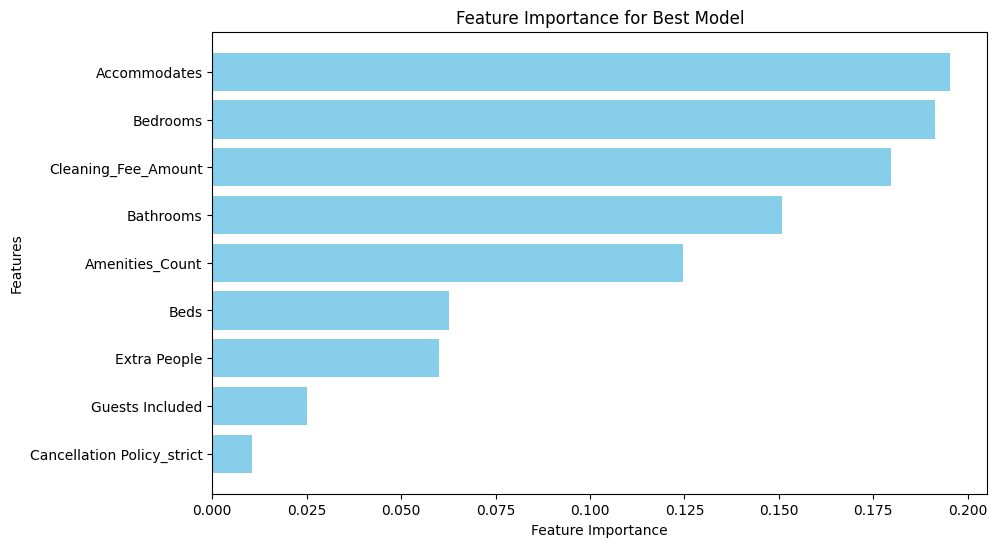

In [40]:
# Visualizar importancia de características (para modelos basados en árboles)
if hasattr(loaded_model, 'feature_importances_'):
    feature_importances = loaded_model.feature_importances_
    features_df = pd.DataFrame({
        'Feature': variables_with_corr,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance for Best Model')
    plt.gca().invert_yaxis()
    plt.show()

Tras medir la importancia de cada característica en el modelo 📊, podemos ver que Bedrooms 🛏️ es la característica más importante, con la barra más larga 🔝. Accommodates 👥 y Cleaning_Fee_Amount 💵 también tienen una alta importancia en la predicción. Por otro lado, características como Guests Included 👨‍👩‍👧‍👦 y Cancellation Policy_strict 🚫 tienen menor relevancia para el modelo, ya que sus barras son más cortas 📉.

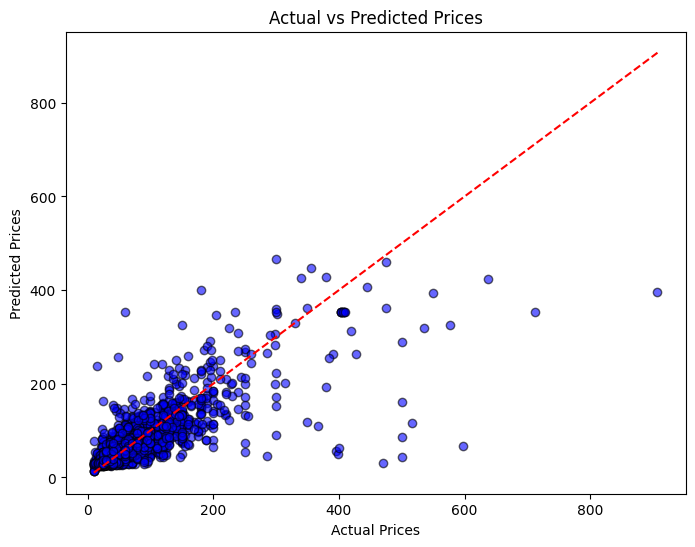

In [41]:
# Visualizar predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k', color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

En esta gráfica estamos comparando los precios reales con los precios predichos 📊💸. La mayoría de los puntos se encuentran cerca de la línea roja 🔴 en valores bajos, lo que indica que el modelo predice relativamente bien para precios más pequeños 🏷️. A medida que los valores reales aumentan (valores en el eje X mayores 📈), se observa una mayor dispersión y más puntos alejados de la línea roja, lo que sugiere que el modelo tiene dificultades para predecir valores más altos con precisión 🧐💥. El modelo funciona bien en rangos bajos y medianos 📉📊, pero pierde precisión a medida que los precios reales aumentan 💰. Esto se debe a que tenemos pocas muestras de valores grandes 🔴, por lo que el modelo no ha podido entrenar bien con estas muestras 🧠.

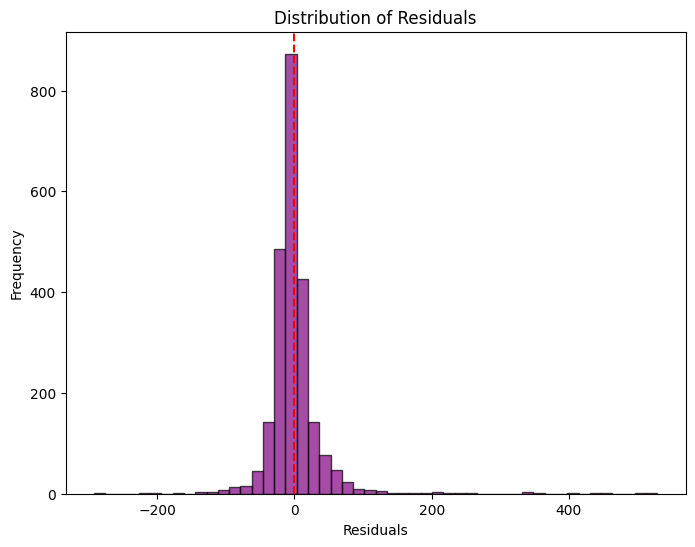

In [42]:
# Visualizar errores residuales
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, color='purple', edgecolor='black', alpha=0.7)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

En la gráfica de arriba podemos ver la distribución de los residuos (los errores de predicción 📉❌). La mayoría de los residuos se agrupan alrededor de 0 🎯, lo cual es un buen signo 👍, porque indica que los errores están balanceados y no hay sesgo sistemático ⚖️. La distribución parece cercana a una distribución normal 📊, lo que es ideal en un modelo de regresión porque sugiere que los errores son aleatorios 🎲 y no siguen un patrón específico 🔄.

## FIN